In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#load haberman.csv into pandas dataframe
haberman = pd.read_csv("haberman.csv")
haberman

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [ ]:
#number of data points and features in the dataset
haberman.shape

(306, 4)

**Observations** :


*   Data points : 305
*   Features : 4




In [ ]:
#what all features present in this dataset
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

**Observations**:
It shows there are four features / coulmns in the dataset


1.   age
2.   year
3.   nodes
4.   status



In [ ]:
#How many classes are there and how many data ponts per class
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

**Observations** :
So there are two classes 1 and 2


*   1 means the patient survived more than 5 years after surgery 
*   2 means the patient survived less than 5 years after surgery

*  Hence there are 225 patients who survived more than 5 years after the surgery 
*   And 81 patients who survived less than 5 years after the surgery
*   Haberman is a imbalanced dataset as there is quite noticable difference between datapoints of both the classes






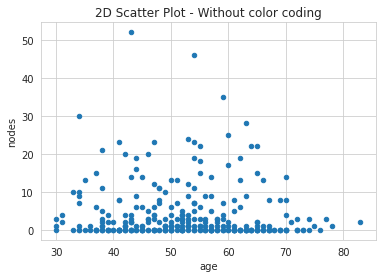

In [ ]:
#2D scatter plot
haberman.plot(kind="scatter",x='age',y='nodes');
plt.title("2D Scatter Plot - Without color coding")
plt.show()

**Observations** :
Here we plotted the graph age versus nodes.
But can not conclude anything as we can not see the sepeartion of classes

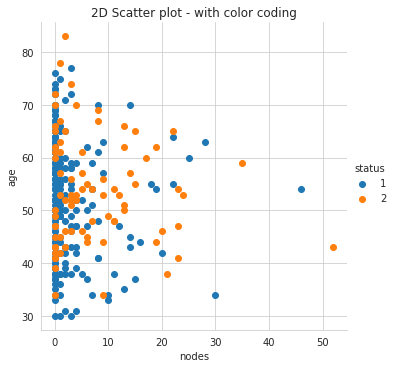

In [ ]:
#2D scatter plot using seaborn with color coding to classify datapoints by the classes
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status",height= 5) \
   .map(plt.scatter,"nodes","age") \
   .add_legend();
plt.title("2D Scatter plot - with color coding")
plt.show();

**Observations** :
1.   So here we can see that blue dots are the patients who survived more than 5 years and orange dots are the patients who survived less than 5 years
2.   It is difficult to seperate these points using two features

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


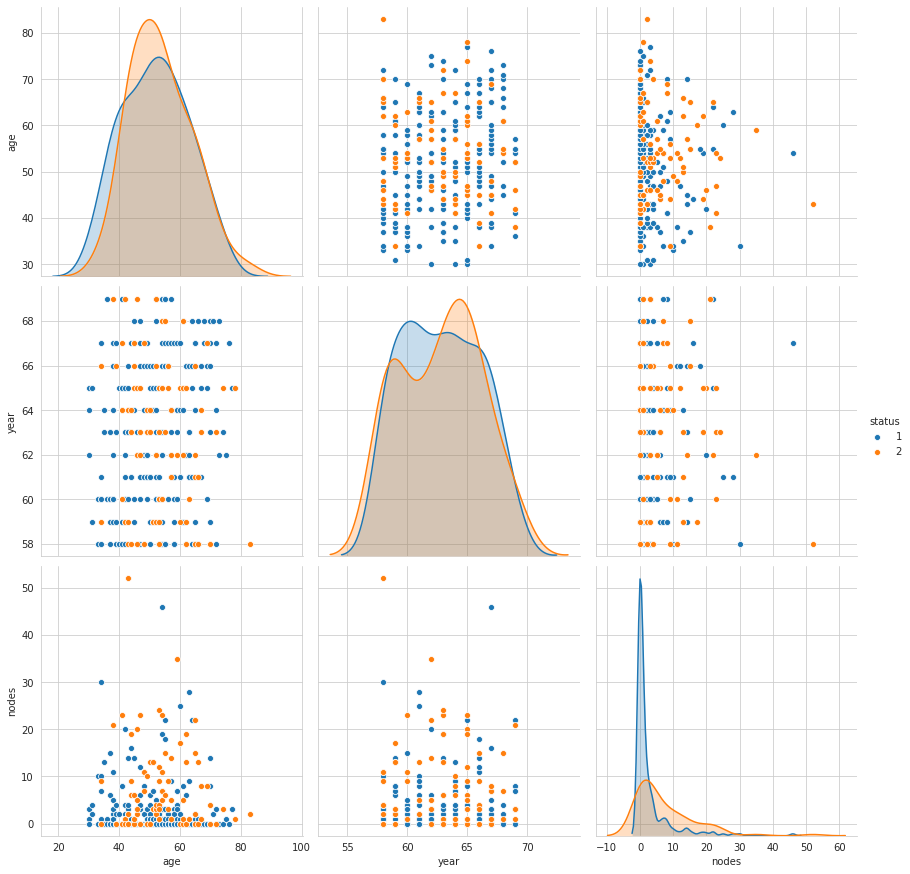

In [ ]:
#Pair-plot - as we know there are 3 featuers to classify the points 
#It gives the 2D scatter plots for all the possible combinations of the features
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman,hue="status",size=4);
plt.show()


**Observations** : If we observe all the plots, then we can see that in age vs nodes few datapoints which are well seperated, though not all points are seperated but still we will take these features forward for further investigation, beacause all other plots seems to be containing more overlapped points.

# **Histogram, PDF and CDF**

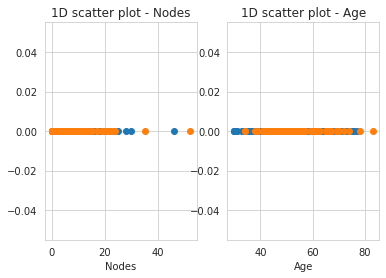

In [ ]:
#lets plot the 1D scatter plot - it is a plot of one feature vs its frequency at perticular point
import numpy as np
#for that we will seperate both the classes
haberman_one = haberman.loc[haberman["status"]==1]
haberman_two = haberman.loc[haberman["status"]==2]
fig, (nodes,age) = plt.subplots(1,2)
nodes.plot(haberman_one["nodes"], np.zeros_like(haberman_one["nodes"]), 'o')
nodes.plot(haberman_two["nodes"], np.zeros_like(haberman_two["nodes"]), 'o')
nodes.set_title("1D scatter plot - Nodes")
nodes.set_xlabel("Nodes")
age.plot(haberman_one["age"], np.zeros_like(haberman_one["age"]), 'o')
age.plot(haberman_two["age"], np.zeros_like(haberman_two["age"]), 'o')
age.set_title("1D scatter plot - Age")
age.set_xlabel("Age")
plt.show()

**Observations** :
Here the datapoints seems to be overlapped. 
So we will try PDF or CDF.

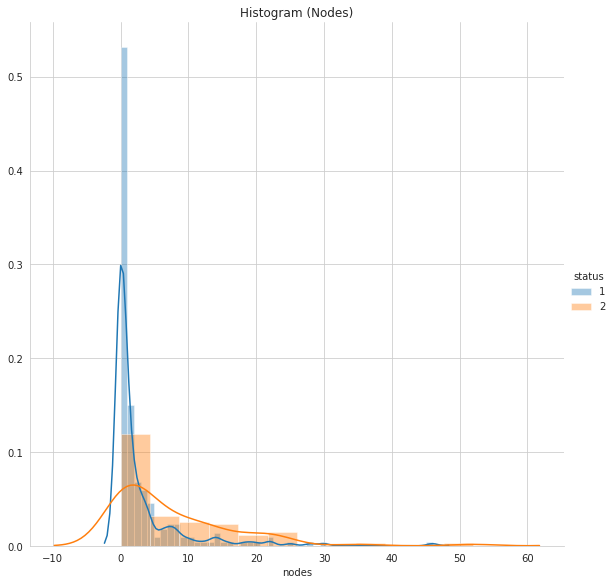

In [ ]:
sns.FacetGrid(haberman, hue="status", height = 8) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("Histogram (Nodes)")
plt.show();

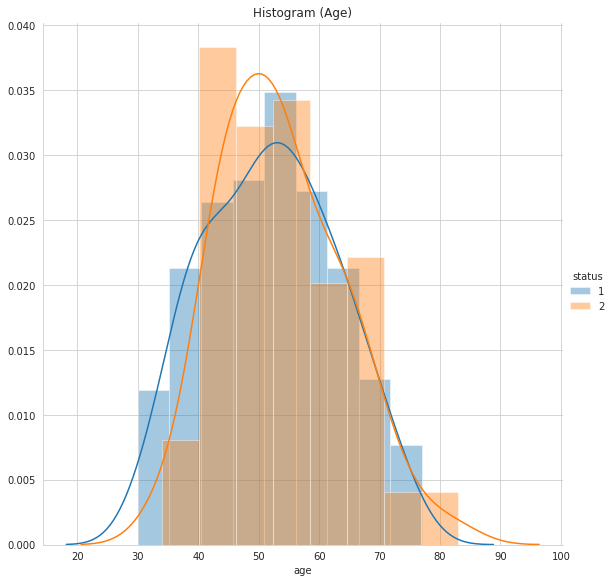

In [ ]:
sns.FacetGrid(haberman, hue="status", height=8) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Histogram (Age)")
plt.show();

**Observations**:
If we observe above two graphs, the PDF of age seems to be more overlapped than that of nodes. Hence we would take nodes as a parameter for further inverstigation.

In [ ]:
#lets plot CDF 

counts, bin_edges = np.histogram(haberman["nodes"], bins=10, density= True, )
print(counts)
print(bin_edges)

[0.14831574 0.0188537  0.01131222 0.00502765 0.00565611 0.00125691
 0.00062846 0.         0.00062846 0.00062846]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


In [ ]:
pdf = counts/sum(counts)
print(pdf)

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]


In [ ]:
cdf = np.cumsum(pdf)
print(cdf)

[0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


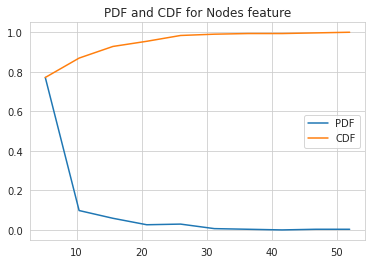

In [ ]:
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(["PDF","CDF"])
plt.title("PDF and CDF for Nodes feature")
plt.show()

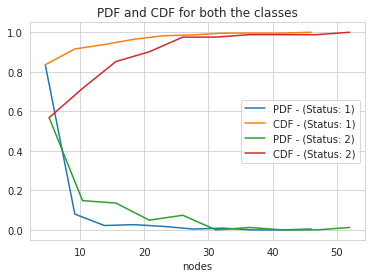

In [ ]:
#plot CDF of nodes for both the classes

#haberman_one
counts, bin_edges = np.histogram(haberman_one["nodes"],bins=10, density=True)

pdf= counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#haberman_two
counts, bin_edges = np.histogram(haberman_two["nodes"],bins=10,density=True)

pdf=counts/sum(counts)
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("nodes")
plt.title("PDF and CDF for both the classes")
plt.legend(["PDF - (Status: 1)","CDF - (Status: 1)","PDF - (Status: 2)","CDF - (Status: 2)"])
plt.show()

**Observations** :


*   If Number of nodes < 25(approx) : Then the chances of patient surviving more than 5 years is comparitively high than that of patient surviving less than 5 years
*   If Number of nodes > 25(approx) : Here we can't conclude anything as the chances of both, surviving more than 5 years and less than 5 years after surgery are almost same.
*   For eg. Suppose Number of nodes are nearly 5, then the chances of surviving more than 5 years is approximately 80%. And chances of surviving less than 5 years after surgery are less i.e approximately 57%.



# **Mean, Varience and Standard Deviation** 

In [ ]:
#mean
print("Means:")
print(np.mean(haberman_one["nodes"]))
print(np.mean(haberman_two["nodes"]))

#std-dev
print("\nStd-Dev:")
print(np.std(haberman_one["nodes"]))
print(np.std(haberman_two["nodes"]))


Means:
2.7911111111111113
7.45679012345679

Std-Dev:
5.857258449412131
9.128776076761632


**Observations** :


*   The average number of long survivals is less than that of short survival.
*   Also the short survivals are well spreaded than long survivals in this dataset.



In [ ]:
#Median, Percentiles, Quantiles, IQR, MAD

print("Medians: ")
print(np.median(haberman_one["nodes"]))
print(np.median(haberman_two["nodes"]))

print("\nQuantiles: ")
print(np.percentile(haberman_one["nodes"],np.arange(0,100,25)))
print(np.percentile(haberman_two["nodes"],np.arange(0,100,25)))

print("\n90th Percentile: ")
print(np.percentile(haberman_one["nodes"],90))
print(np.percentile(haberman_two["nodes"],90))

from statsmodels import robust
print("\nMedian Absolute Deviation: ")
print(robust.mad(haberman_one["nodes"]))
print(robust.mad(haberman_two["nodes"]))





Medians: 
0.0
4.0

Quantiles: 
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentile: 
8.0
20.0

Median Absolute Deviation: 
0.0
5.930408874022408


**Observations** :


*   Most of the long survivals had 0 number of Lymph nodes affected whereas short survivals had 4 number of nodes.
*   Almost 75% of the patients who survived more than 5 years after surgery had 0 Lymph nodes affected.
*   90% of total patients who survived had less than or equal to 8 nodes and who could not survive had less than or equal to 20 nodes affected.




# **Box Plot**

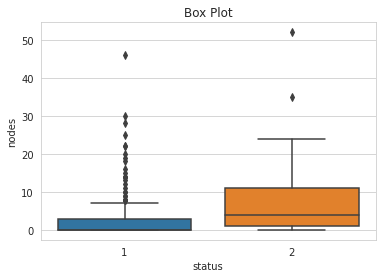

In [ ]:
sns.boxplot(x="status",y="nodes",data=haberman)
plt.title("Box Plot")
plt.show()

**Observations** :
*   25%-75% of the total long survivals had nodes between 0-4
*   25%-75% of the total short survivals had nodes between 2-12
*   25% of the short survivals data are overlapping with 50% of the long survivals data.(approx)
*   Patient would rarely survive more than 5 years if he is having more than 15 lymph nodes affected.


# **Violin plots**

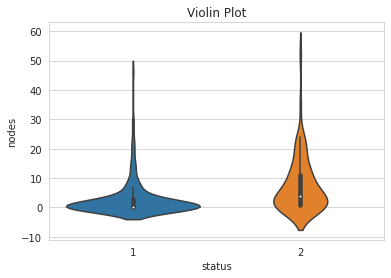

In [ ]:
#Violin plot
sns.violinplot(x="status",y="nodes",data=haberman)
plt.title("Violin Plot")
plt.show()

**Observations** :
The only difference is, in violin plot we can also see the pdf of the feature. So by looking at the spreaded curve, we can say most of the long survivals are having 0-8 nodes and short survivals are having 0-25 nodes 

# **Contour Plot - Multivariate analysis**

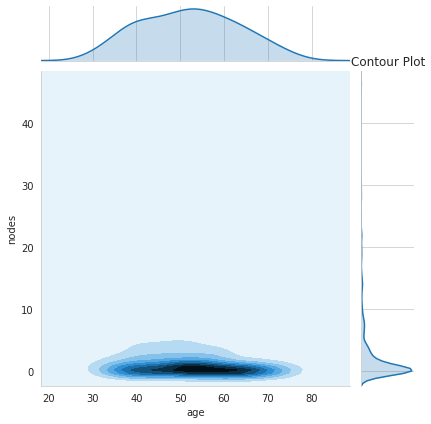

In [ ]:
#jointplot
sns.jointplot(x="age",y="nodes",data=haberman_one,kind="kde")
plt.title("Contour Plot")
plt.show()

**Observations** :
The patients in age group 45-65 having lymph nodes between 0-3 and survived more than 5 years are more.

**Conclusion** :
Hence we performed the univariate, bivariate and multivariate analysis on the dataset and observed many inferences from it.